In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
text = 'Tokenizing text is a core task of NLP.'
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


### 고유정수로 인코딩

In [3]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [4]:
# 고유정수로 매핑
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


### 인코딩 예시

In [5]:
categorical_df = pd.DataFrame({'Name': ['Bumblebee', 'Optimus Prime', 'megatron'],
                              'label ID':[0,1,2]})
categorical_df

,Name,label ID
0,Bumblebee,0
1,Optimus Prime,1
2,megatron,2


In [6]:
# onehot 인코딩 by pandas
pd.get_dummies(categorical_df['Name'])

,Bumblebee,Optimus Prime,megatron
0,1,0,0
1,0,1,0
2,0,0,1


### make by pytorch

In [7]:
import torch
import torch.nn.functional as F

In [8]:
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [9]:
# 확인
print(f'토큰: {tokenized_text[0]}')
print(f'텐서 인덱스: {input_ids[0]}')
print(f'원-핫 인코딩: {one_hot_encodings[0]}')

토큰: T
텐서 인덱스: 5
원-핫 인코딩: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### 작업 간소화

In [10]:
tokenized_text = text.split()
print(tokenized_text)
# NLP.으로 표현됨

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


## 부분단어 토큰화

In [11]:
# AutoTokenizer -> 자동 추출
from transformers import AutoTokenizer
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [12]:
encoded_text = tokenizer(text)
# input_ids -> 고유정수에 맵핑
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


## 토큰이 추가됨
### 1. [CLS] / [SEP] 추가
### 2. 소문자 변경
### 3. tokenizing / NLP 각각 두개의 토큰으로 나뉨

In [13]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [14]:
# 토큰 재결합
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [15]:
# 어휘 사전 크기
tokenizer.vocab_size

30522

In [16]:
# 최대 문맥 크기
tokenizer.model_max_length

512

In [17]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

### 전체 데이터셋 토큰화하기

In [18]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [19]:
from datasets import load_dataset
emotions = load_dataset("emotion")

No config specified, defaulting to: emotion/split


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /Users/heewonkim/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [20]:
print(tokenize(emotions['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [21]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [22]:
print(emotions_encoded['train'].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [23]:
from transformers import AutoModel

In [24]:
model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [26]:
# 사전훈련 모델 호출
from transformers import TFAutoModel
tf_model = TFAutoModel.from_pretrained(model_ckpt)

2023-04-25 17:42:56.560442: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_transform', 'vocab_layer_norm', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model

In [27]:
# 가중치 다운로드 변환('pt'-> pytorch / 'tf' -> tensorflow)
tf_xlmr = TFAutoModel.from_pretrained('xlm-roberta-base', from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


### 마지막 은닉 상태 추출

In [28]:
text = 'this is a test'
inputs = tokenizer(text, return_tensors='pt')

In [29]:
inputs['input_ids']

tensor([[ 101, 2023, 2003, 1037, 3231,  102]])

In [30]:
print(f"입력 텐서 크기: {inputs['input_ids'].size()}")

입력 텐서 크기: torch.Size([1, 6])


In [31]:
inputs.items()

dict_items([('input_ids', tensor([[ 101, 2023, 2003, 1037, 3231,  102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1]]))])

In [32]:
inputs = {k:v.to(device) for k,v in inputs.items()}

In [33]:
# 그레이디언트 자동 계산 비활성화 -> no_grad()
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)


In [34]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [35]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [36]:
# 은닉 상태 추출
def extract_hidden_states(batch):
    # 모델 입력을 GPU로 옮김
    inputs = {k:v.to(device) for k,v in batch.items()
             if k in tokenizer.model_input_names}
    # 마지막 은닉 상태를 추출
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # [CLS] 토큰에 대한 벡터를 반환
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [37]:
emotions_encoded.set_format('torch',
                           columns=['input_ids','attention_mask','label'])

In [38]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [39]:
emotions_hidden['train'].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

### 특성 행렬 만들기

In [40]:
import numpy as np

X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [41]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [42]:
# 특성 스케일을 [0,1] 범위로 조정
X_scaled = MinMaxScaler().fit_transform(X_train)
print(X_scaled.dtype)

float32


In [43]:
X_scaled

array([[0.36425298, 0.58609873, 0.39730027, ..., 0.7459279 , 0.50480545,
        0.69274837],
       [0.4534636 , 0.4561193 , 0.33501157, ..., 0.5397172 , 0.5051364 ,
        0.60421956],
       [0.5296932 , 0.6890426 , 0.6535349 , ..., 0.59325564, 0.48888618,
        0.6854385 ],
       ...,
       [0.4840831 , 0.39301956, 0.57452935, ..., 0.65629464, 0.3932731 ,
        0.6084527 ],
       [0.5580838 , 0.6603528 , 0.64099735, ..., 0.7481152 , 0.43671057,
        0.74880636],
       [0.50531715, 0.58877975, 0.51256526, ..., 0.63666946, 0.495305  ,
        0.5319331 ]], dtype=float32)

In [44]:
# UMAP 객체를 생성하고 훈련
# mapper = UMAP(n_components=2 , metric='cosine').fit(X_scaled)
mapper = UMAP(n_components=2).fit(X_scaled)

In [45]:
# 2D 임베딩의 데이터프레임을 만듬
df_emb = pd.DataFrame(mapper.embedding_, columns=['X','Y'])
df_emb['label'] = y_train
df_emb.head()

,X,Y,label
0,4.598123,5.913773,0
1,-2.596968,4.755143,0
2,5.571944,2.340924,3
3,-1.740512,2.579093,2
4,-2.924673,2.691565,3


### 그림

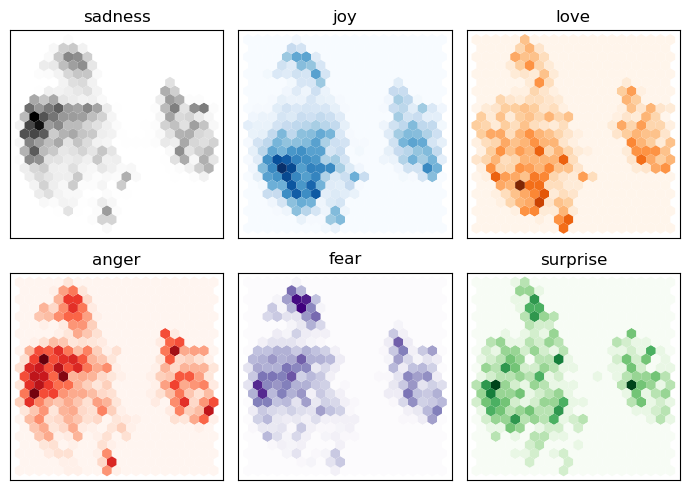

In [46]:
fig, axes = plt.subplots(2,3, figsize=(7,5))
axes = axes.flatten()
cmaps = ['Greys', 'Blues', 'Oranges', 'Reds', 'Purples', 'Greens']
labels = emotions['train'].features['label'].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub['X'], df_emb_sub['Y'], cmap=cmap,
                  gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])
    
plt.tight_layout()
plt.show()
# sadness, anger, fear -> 부정적 감정 다른 분포
# joy, love -> 부정적 감정과 분리되며 비슷한 영역
# surprise -> 전체 영역에 골고루 퍼짐

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
# 수렴을 위해 'max_iter' 증가
# 로지스틱회기 사용
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6335

In [49]:
from sklearn.dummy import DummyClassifier

In [50]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

In [51]:
# 시각화
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [52]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize='true')
    fig, ax = plt.subplots(figsize=(6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
    disp.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=False)
    plt.title('Normalized confusion matrix')
    plt.show()

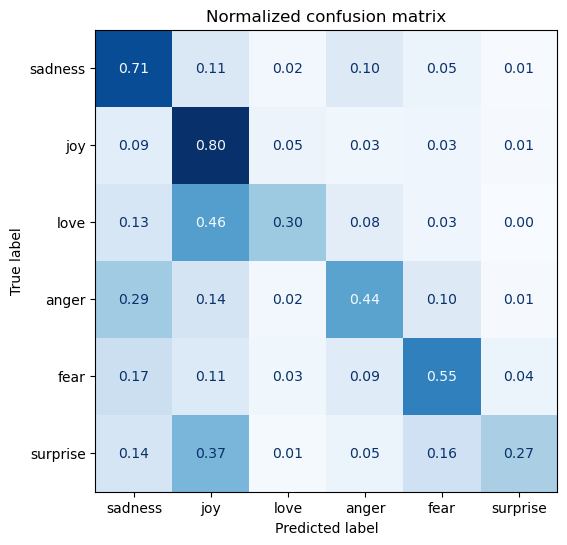

In [53]:
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)
# love , surprise 는 joy 와 혼동
# anger 는 sadness와 혼동

In [54]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model = (AutoModelForSequenceClassification
        .from_pretrained(model_ckpt, num_labels=num_labels)
        .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classi

In [55]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average = 'weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy":acc, "f1":f1}

### 모델 훈련하기

In [96]:
from huggingface_hub import notebook_login
notebook_login()

Token is valid.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Your token h

In [64]:
from transformers import Trainer, TrainingArguments
batch_size = 64
logging_steps = len(emotions_encoded['train']) // batch_size


model_name = f'{model_ckpt}-finetuned-emotion'
# 튜닝
training_args = TrainingArguments(output_dir=model_name,
                                 num_train_epochs=2,
                                 learning_rate=2e-5,
                                 per_device_train_batch_size=batch_size,
                                 per_device_eval_batch_size=batch_size,
                                 weight_decay=0.01,
                                 evaluation_strategy='epoch',
                                 disable_tqdm=False,
                                 logging_steps=logging_steps,
                                 push_to_hub=True,
                                 save_strategy='epoch',
                                 load_best_model_at_end=True,
                                 log_level='error')

In [65]:
from transformers import Trainer

In [72]:
trainer = Trainer(model=model, args=training_args,
                 compute_metrics=compute_metrics,
                 train_dataset=emotions_encoded['train'],
                 eval_dataset=emotions_encoded['validation'],
                 tokenizer=tokenizer)
trainer.train()

Cloning https://huggingface.co/codeKim/distilbert-base-uncased-finetuned-emotion into local empty directory.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/Applications/anaconda3/envs/py39/lib/python3.9/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.795700,0.312355,0.908000,0.906712
2,0.246000,0.219933,0.922500,0.922511


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Several commits (2) will be pushed upstream.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

TrainOutput(global_step=500, training_loss=0.5208651580810547, metrics={'train_runtime': 7123.8015, 'train_samples_per_second': 4.492, 'train_steps_per_second': 0.07, 'total_flos': 720342861696000.0, 'train_loss': 0.5208651580810547, 'epoch': 2.0})

In [73]:
preds_output = trainer.predict(emotions_encoded['validation'])

In [74]:
preds_output.metrics

{'test_loss': 0.21993307769298553,
 'test_accuracy': 0.9225,
 'test_f1': 0.922510995111349,
 'test_runtime': 30.5231,
 'test_samples_per_second': 65.524,
 'test_steps_per_second': 1.048}

In [75]:
y_preds = np.argmax(preds_output.predictions, axis=1)

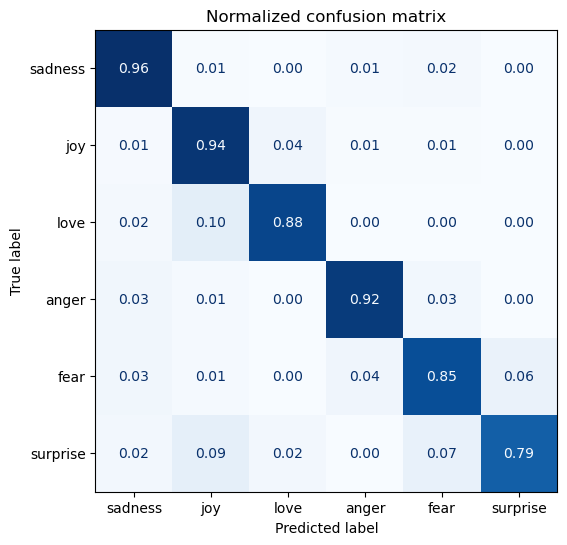

In [76]:
# 0에 가까운 오차
plot_confusion_matrix(y_preds, y_valid, labels)

## 케라스 미세 튜닝

In [77]:
from transformers import TFAutoModelForSequenceClassification

In [78]:
tf_model = (TFAutoModelForSequenceClassification
           .from_pretrained(model_ckpt, num_labels=num_labels))

In [79]:
# 텐서플로 텐서로 변환할 열 이름
tokenizer_columns = tokenizer.model_input_names

tf_train_dataset = emotions_encoded['train'].to_tf_dataset(
columns=tokenizer_columns, label_cols=['label'], shuffle=True,
batch_size=batch_size)

tf_eval_dataset = emotions_encoded['validation'].to_tf_dataset(
columns=tokenizer_columns, label_cols=['label'], shuffle=False,
batch_size=batch_size)

In [81]:
# import tensorflow as tf
# tf_model.compile(
# optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
# loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
# metrics=tf.metrics.SparseCategoricalAccuracy())

# tf_model.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=2)

### 오류 분석

In [82]:
from torch.nn.functional import cross_entropy

In [83]:
def forward_pass_with_label(batch):
    # 모든 입력 텐서를 모델과 같은 장치로 이동
    inputs = {k:v.to(device) for k,v in batch.items()
             if k in tokenizer.model_input_names}
    
    with torch.no_grad():
        output =model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch['label'].to(device),
                            reduction='none')
        # 다른 데이터셋 열과 호환되도록 출력을 CPU로 옮김
        return {'loss': loss.cpu().numpy(),
               'predicted_label': pred_label.cpu().numpy()}

In [84]:
# 데이터셋을 다시 파이토치 텐서로 변환
emotions_encoded.set_format('torch',
                           columns=['input_ids', 'attention_mask', 'label'])
# 손실값 계산
emotions_encoded['validation'] = emotions_encoded['validation'].map(forward_pass_with_label, 
                                                                    batched=True,
                                                                   batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [88]:
def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)

In [89]:
# 데이터 프레임 생성
emotions_encoded.set_format('pandas')
cols = ['text', 'label', 'predicted_label', 'loss']
df_test = emotions_encoded['validation'][:][cols]
df_test['label'] = df_test['label'].apply(label_int2str)
df_test['predicted_label'] = (df_test['predicted_label'].apply(label_int2str))


In [91]:
# 내림차순 정렬
df_test.sort_values('loss', ascending=False).head(10)

,text,label,predicted_label,loss
1963,i called myself pro life and voted for perry w...,joy,sadness,5.386946
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.343583
882,i feel badly about reneging on my commitment t...,love,sadness,5.156935
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.142884
1950,i as representative of everything thats wrong ...,surprise,sadness,5.133456
1274,i am going to several holiday parties and i ca...,joy,sadness,4.786282
1801,i feel that he was being overshadowed by the s...,love,sadness,4.629110
1111,im lazy my characters fall into categories of ...,joy,fear,4.566634
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.521466
1757,i feel like there s a reason to buy another to...,anger,joy,4.515037


In [92]:
df_test.sort_values('loss', ascending=True).head(10)

,text,label,predicted_label,loss
267,i feel like im alone in missing him and becaus...,sadness,sadness,0.016897
1861,im tired of feeling lethargic hating to work o...,sadness,sadness,0.016959
244,im kinda relieve but at the same time i feel d...,sadness,sadness,0.017378
1873,i feel practically virtuous this month i have ...,joy,joy,0.017543
1140,i do think about certain people i feel a bit d...,sadness,sadness,0.017623
76,i feel like im an unwelcome presence whenever ...,sadness,sadness,0.017646
1452,i always feel guilty and come to one conclusio...,sadness,sadness,0.017715
1041,i suppose it all goes along with feeling unwel...,sadness,sadness,0.017728
866,i feel quite jaded and unenthusiastic about li...,sadness,sadness,0.017756
1120,i am feeling a little disheartened,sadness,sadness,0.017844


### 허깅페이스 모델 저장 및 공유

In [97]:
trainer.push_to_hub(commit_message='Training completed!')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
